## Simulación numérica del oscilador armónico cuántico en contacto con baños térmicos mediante métodos Monte Carlo-Markov

### Gustavo Adolfo Castrillón Yepes
### Instituto de Física, Universidad de Antioquia
### Calle 70 \# 52-21, Apartado Aéreo 1226, Medellín, Colombia.

## Abstract

En la física contemporánea, tanto teórica como experimental, las simulaciones computacionales se han convertido en una herramienta fundamental para estudiar fenómenos naturales complejos que no son accesibles a la observación directa o requieren validación teórica. Este trabajo se enfoca específicamente en sistemas cuánticos acoplados a baños térmicos, utilizando como modelo de prueba el oscilador armónico cuántico termalizado.

El desarrollo presentado en este notebook detalla la implementación del algoritmo Metropolis mediante métodos de Monte Carlo con cadenas de Markov (MCMC), diseñado para reproducir los resultados teóricos de sistemas cuánticos en equilibrio térmico. Los resultados muestran que, el algoritmo es capaz de reproducir con una presición del 99% las predicciones de la teória cuántica. Ademas, en el régimen de altas temperaturas, el mismo formalismo reproduce consistentemente el comportamiento clásico del oscilador. En general, estos algoritmos presentan una gran versatilidad, siendo aplicables a otros sistemas cuánticos termalizados. 

Como prueba de concepto, hemos extendido exitosamente el método al caso del pozo de potencial infinito, demostrando así la generalidad del enfoque. Esta versatilidad sugiere que la metodología podría aplicarse a una amplia gama de problemas en física estadística cuántica.
 

## Palabras clave: Oscilador armonico cuántico, Temperatura, Métodos de montecarlo, Cadenas de Markov, Algoritmo de metropolis.

## Introducción 

En este notebook analizaremos el problema del oscilador armónico cuántico cuando se encuentra sometido a un baño termico.

En mecánica cuántica, los sistemas se suelen estudiar a temperatura cero. No obstante, en sistemas reales es fundamental considerar los efectos de un baño térmico, producto de las interacciones con el entorno. El estudio de estos fenómenos a temperatura finita (T > 0) requiere combinar herramientas de mecánica cuántica y física estadística, donde el sistema cuántico adquiere dependencia térmica.

Resolver estos problemas analíticamente implica cálculos teóricos complejos, y las simulaciones numéricas pueden volverse computacionalmente demandantes. Por ello, es crucial emplear métodos eficientes que permitan incorporar el acoplamiento entre el sistema cuántico y el reservorio térmico.

En este trabajo nos centraremos en un *"Toy Model"*, el oscilador armónico cuántico acoplado a un baño térmico. Nuestro objetivo es simular el sistema partiendo de su función de onda a temperatura cero (el caso estándar en mecánica cuántica) y emplear un método de Monte Carlo con cadenas de Markov (MCMC) para estudiar su comportamiento a T > 0. Esto nos permitirá cuantificar la precisión de nuestras simulaciones al compararlas con los resultados teóricos conocidos. La elección de este sistema se justifica por su relevancia en mecánica cuántica y física estadística, además de poseer solución analítica, lo que facilita la validación de nuestros resultados.

Como complemento, incluiremos un ejemplo adicional donde aplicaremos el mismo método MCMC a un pozo de potencial con paredes infinitas bajo efectos térmicos. Para ello, hemos desarrollado una función generalizable que puede adaptarse a cualquier función de onda conocida en mecánica cuántica, demostrando la versatilidad de nuestro enfoque.

In [1]:
import random #Para números aleatorios. 
import numpy as np #Calculos númericos
#Para mostrar el gráfico en el notebook
%matplotlib inline 
import matplotlib.pyplot as plt #Realizar gráficos

## Pregunta 1

Sabemos que, la probabilidad $\pi (x) $ de una partícula clásica en un potencial armónico a una temperatura $T=1/\beta$ está dáda por: $\pi (x)  exp(-\beta x^2 /2)$. ¿Cómo podemos entender que en $T \rightarrow 0$, dicha partícula está localizada e inmóvil en $x = 0$ correspondiendo a un mínimo de energía?.

## Respuesta 1


A bajas temperaturas, el movimiento de las partículas disminuye (menor energía cinética), lo que reduce la probabilidad de transición entre estados en una partícula clásica. Como consecuencia, la partícula tiende a localizarse alrededor de $x \rightarrow 0$, donde la energía potencial es mínima.
Cuando se tiene una baja temperatura, se presenta un menor movimiento de las partículas (menor energía cinetica), lo cual lleva a que en una partícula clásica la probabilidad de que la partícula transicione entre estados sean pequeña, esto conlleva a que la partícula se encuentre localizada en un $x = 0$.


## Pregunta 2:
¿Cómo se puede simular la función de onda al cuadrado por números aleatorios?. 

Veamos como es el comportamiento de la función de onda de una partícula cuantica en un potencial armónico en el estado base ($n=0$). 
Para esto partamos de la solución teorica de la función de onda para $n=0$: 

$$ \psi _{0}  = \frac{e^{- x^{2}/2}}{\pi^{1/4}} $$

Para conocer la distribución de las probabilidades en necesario elevar esta función al cuadrado, la cual va a ser definida de la siguiente manera $\pi(x) = |\psi_{0}|^{2}$. Como vemos, esta distribución no depende de la temperatura, únicamente tiene una dependencia en torno a la posición de la partícul. Entonces primero empecemos construyendo un algoritmo de metropolis que me permita simular esta misma función pero a partir de números aleatorios. 


### Construcción del algoritmo

Inicializamos el sistema en su estado de equilibrio, $x=0$. El algoritmo procede de la siguiente manera:

**1. Perturbación aleatoria:**
Generamos una pequeña perturbación aleatoria en el rango $[−0.5,0.5]$, modificando la posición actual $x$ como:

$$x_{\text{new}} = x + \text{random.uniform}(−0.5,0.5) \text{ .} $$

Esta nueva posición $x_{\text{new}}$ representa una posible transición del sistema fuera del equilibrio.

**2. Criterio de aceptación:**

La probabilidad de transición a $x_{\text{new}}$ está dada por la distribución objetivo $\pi(x_{\text{new}})$(normalizada entre $0$ y $1$). Para decidir si aceptamos o rechazamos este movimiento:

- Generamos un número aleatorio $r∼\text{uniform}(0,1)$.
  
- Si $r<\pi(x_{\text{new}})$, aceptamos la transición y actualizamos $x = x_{\text{new}}$.

- En caso contrario, el sistema permanece en x.

**3. Iteración y convergencia:**
Repetimos este proceso un número suficientemente grande de veces (usualmente miles o millones de iteraciones) para garantizar una buena estadística. Idealmente, después de muchas muestras, el histograma de posiciones $x$ debe reproducir la distribución de probabilidad $∣\psi(x)∣^{2}$ asociada a la función de onda cuántica en estudio.

Este enfoque permite simular el comportamiento estadístico de un sistema cuántico mediante generación de números aleatorios, replicando la distribución de probabilidad teórica sin necesidad de resolver la ecuación de Schrödinger directamente.

In [2]:
#Función de onda en el estado base para una partícula en un potencial armónico
def psi0(x):
    return (1/np.pi**(1/4)) * np.exp(- (x**2)/2)

In [3]:
x = 0.0 #Condicion incial 
delta = 0.5 #Valores limites en X
n_steps = 100000 #Cantidad maxima de iteraciones.
#Posible cantidad de iteraciones probadas, la diferencia entre los datos no cambia y solo se aumenta el tiempo de ejecución. 
#n_steps = 1000000 
#n_steps = 10000000
data = [x] #Vector para almacenar los datos. 

#Método de monte carlo para generar pasos de la función con n = 0 
for j in range(n_steps):
    #Generamos un nueva posición entre (x - delta, x + delta) de forma aleatoria.
    x_new = x + random.uniform(-delta, delta) 
    '''
    Haciendo uso de la función de onda, verificamos si es posible tener una transición
    Para esto vamos a comprar un número aleatorio con el valor (psi0(x_new) / psi0(x))**2
    '''
    if (random.uniform(0.0,1.0)< np.abs(psi0(x_new))**2 / np.abs(psi0(x)**2)):
        #En caso de ser aceptado, sucede lo siguiente.
        x = x_new #Actualizamos el valor de la posición 
        data.append(x_new) #Almacenamos el valor de la posición.
    #Cuando el valor no es aceptado, conservamos la posición x. 

In [4]:
media = np.mean(data)
desviacion = np.std(data)

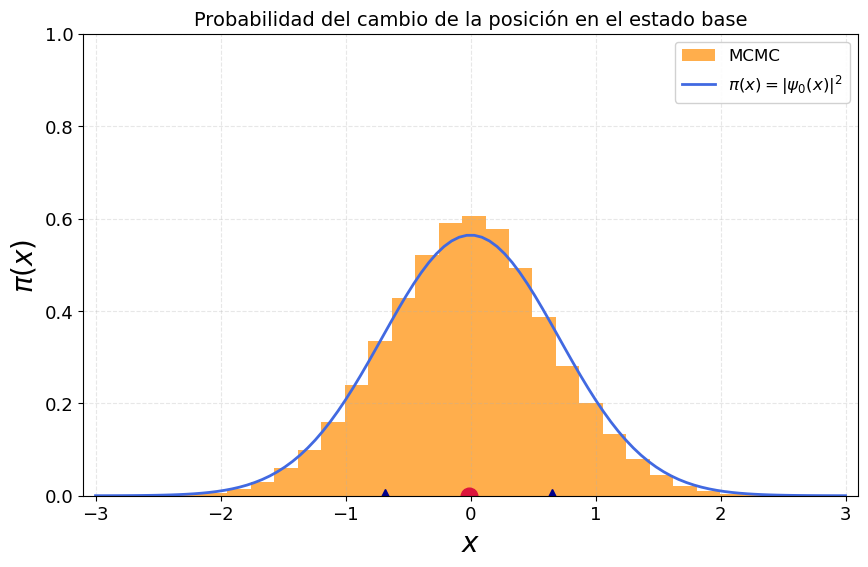

In [5]:
plt.figure(figsize=(10, 6))

# Histograma 
plt.hist(data, bins=30, density=True, alpha=0.7, color='darkorange', label='MCMC')  

# Función teórica
x_values = np.linspace(-3,3,100)
plt.plot(x_values, psi0(x_values)**2, '-', color='royalblue', linewidth=2, 
         label=r'$\pi(x) = |\psi_0(x)|^2$')  

# Media y desviación estándar
plt.plot(media, 0, 'o', markersize=12, color='crimson')  # Rojo intenso
plt.plot(media - desviacion, 0, '^', markersize=10, color='darkblue')  # Azul fuerte
plt.plot(media + desviacion, 0, '^', markersize=10, color='darkblue')  # Azul fuerte

# Ajustes estéticos
plt.title(r'Probabilidad del cambio de la posición en el estado base', size=14)
plt.xlabel(r'$x$', size=20)
plt.ylabel(r'$\pi(x)$', size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
plt.ylim(0, 1)
plt.xlim(-3.1,3.1)
plt.show()

Se puede observar como, para un problema del oscilador armónico cuantico, cuando tenemos una temperatura igual a cero existe mayor posibilidad de que la partícula se encuentre localizada en la posición cero. Algo similar a la teoría presentada en el oscilador clásico. Por otro lado, también es posible ver que, aunque en este caso estamos consierando un comportamiento cuantico, los puntos azules que marcan al desviación estándar de la partícula, se encuentran inferiores a $|1|$, si bien, cuánticamente la partícula no estaría confinada en su posición cero, si tendríamos mayor probabilidad de encontrarla cercana a este valor medio.

En la imagen también se observa que el comportamiento de la simulación es similar a la distribución, sin embargo, es necesario someter esto a varios métodos para calcular una medida cuantitativa de la diferencia entre ambos.

In [6]:
#Vamos a calcular que tanto se asemeja la función de onda a el histograma 
counts, bin_edges = np.histogram(data, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  #Calculamos el valor central de cada bin. 
theoretical_values = psi0(bin_centers)**2 #El punto central con el valor teorico. 
#Se eleva al cuadrado ya que es una función de onda. 

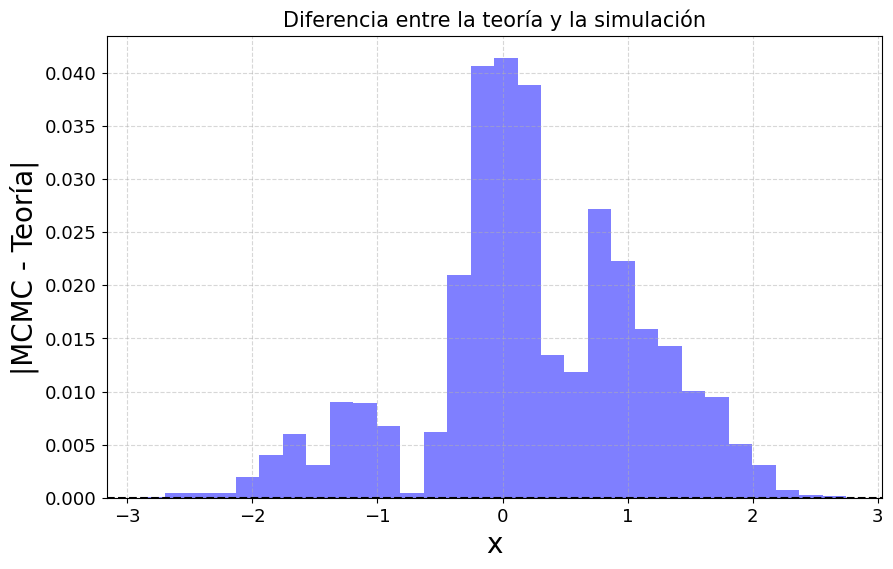

In [7]:
plt.figure(figsize=(10, 6))
plt.title('Diferencia entre la teoría y la simulación',size=15)
plt.bar(bin_centers, abs(counts - theoretical_values), width=bin_edges[1] - bin_edges[0], alpha=0.5, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x', size=20)
plt.ylabel('|MCMC - Teoría|', size=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

Cuando realizamos una compración entre el valor teorico y los datos provistos por el algoritmo, encontramos que por ejemplo, el valor de diferencia más alto entre las funciones se encuentra cercano a $x=0$. Esta diferencia se podría explicar debido a que, necesitamos mayor cantidad de iteraciones para mapear ese punto en partícular, esto debido es un pico en la probabilidad. Si bien, estamos usando una cantidad de iteraciones de $1\times10^{5}$, aumentar el número de iteraciones no presentaría un cambio drastico y por otro lado, lo que haría sería aumentar el tiempo de convergencia del algoritmo.

Sin embargo, para comparar nuestros datos con las funciones teóricas, se propone la siguiente línea de codigo:

In [8]:
#Esta línea de codigo es usada para calcular el valor del coeficiente R² de correlación 
#también puede llegar a usarse para calcular este valor el siguiente codigo: 
'''
from sklearn.metrics import r2_score
r2 = r2_score(counts_, theoretical_values_)
print(f"Coeficiente R²: {r2:.4f} ")
'''
def calcular_r2(y_observado, y_predicho):
    # Calcular suma de errores al cuadrado (SSE)
    sse = np.sum((y_observado - y_predicho) ** 2)
    
    # Calcular suma total de cuadrados (SST)
    y_media = np.mean(y_observado)
    sst = np.sum((y_observado - y_media) ** 2)
    
    # Calcular R²
    r2 = 1 - (sse / sst)
    return r2

def calc_error(counts_, theoretical_values_):
    #Vamos a calcular el error cuadrático medio, comparando el valor dado por la función de onda al cuadrado con el método de MCMC
    mse = np.mean((counts_ - theoretical_values_) ** 2)*100
    print(f"\033[1mError cuadrático medio (MSE):\033[0m {mse:.4f} %")
    
    epsilon = 1e-10  # Pequeña constante para estabilidad
    kl_divergence = np.sum(counts_ * np.log((counts_ + epsilon) / (theoretical_values_ + epsilon)))
    print(f"\033[1mKL Divergence:\033[0m {kl_divergence:.4f}")
    
    #Ahora si, por ejemplo, queremos saber que tanto se parecen la teoria a los datos, podemos calcular el coeficiente de correlación
    #para esto, vamos a importar de la libreria sklearn, r2_score. Y comparamos ambos valores
    
    r2 = calcular_r2(counts_, theoretical_values_)
    print(f"\033[1mCoeficiente R²:\033[0m {r2:.4f} ")

calc_error(counts, theoretical_values)

Error cuadrático medio (MSE): 0.0262 %
KL Divergence: 0.0170
Coeficiente R²: 0.9940 


En este caso podemos observar que el error cuadrático medio esta cercano a 0.011%, por lo que, podemos dar certeza de que nuestra simulación arroja una teoria bastante cercana al modelo. Ademas, el tener un coeficiente R² de 0.99, nos indica que, el 99% de la variación de los datos obtenidos por el algoritmo son explicados por el modelo teorico (o viceversa).  Por otro lado, el tener un valor de la distancia de KL (Distancia de Kullback-Leibler) inferior $0.01$ nos indica que, la perdida de información al aproximar esta función teorica mediante el método de MCMC es mínima y podemos tener bastante certeza que, nuestro modelo de MCMC simula los resultados teoricos. Ademas, el error entre estas se deben a fluctuaciones tipicas o errores a la hora de discretizar. Esto se puede deber por ejemplo, a considerar 30 bins y no 20 o menores, pero no es tan relevante y con este valor es posible trabajar con 30 bins y llegar a una buena simulación.

## Polinomios de Hermite. 

Se sabe que, de la solución al oscilador armónico cuántico, que la función de onda esta descrita por una funciones que dependen de los polinomios de Hermite. Por lo tanto, si queremos estudiar un modelo general, en el cual, consideremos diferentes estados $n$ y diferentes posiciones $x$ se debe construir estos polinomios. 

Si bien, estos ya estan implementados en python por medio de la libreria $\text{scipy.special.hermite}$, es posible construirlos a partir de una relación de recurrencia, que en nuestro caso, va a ser el método que se va a utilizar. Para esto se construye una función, la cual se le ingresa la posición y el nivel de energía y calcula el valor numerico de la función de onda en el estado $n$ y la posición $x$.

In [9]:
'''
Para utilizar la formula de recurrencia es necesario conocer la función de onda en el nivel 0 y en el nivel 1. 
Por lo tanto, vamos a hacer uso de la teoría para plantear ambas funciones de forma analitica. 

En la presente función vamos a ingresarle el valor de la posición y el valor del nivel de energía y va a retornar, 
el valor de la función de onda en el nivel n con posición x. 
'''
def hermite(x,n):
    #Si n = 0, estamos en el estado base. 
    if n==0: 
        return np.exp(-x**2 / 2.0) / (np.pi ** 0.25) #Función de onda del estado base
    #Si n = 1, estamos en el primer estado excitado 
    elif n==1:
        #Vamos a utilizar la misma función para calcular el valor en el estado base. 
        return np.sqrt(2.0) * x * hermite(x,0) #Función de onda del primer estado excitado
        
    #En el caso cuando, n>1 se ejecutará esta parte del codigo. 
    #Vamos a crear un arreglo con n+1 puntos.
    psi = [0.0]*(n+1)
    psi[0] = hermite(x,0) #Vamos a almacenar el valor en x, del estado base
    psi[1] = hermite(x,1) #Vamos a almacenar el valor en x, del primer estado excitado

    for i in range(2, n+1):
        #Vamos a utilizar la formula de recurrencia. 
        psi[i] = np.sqrt(2.0/i) * x * psi[i-1]- np.sqrt((i-1.0)/i) * psi[i-2]
    #Aquí vamos a terminar calculando n funciones de onda. 
    #Y vamos únicamente a retornar el valor que necesita el usuario. 
    #Es posible retornar todos los valores de la función de onda para la misma posición pero para diferentes estados, 
    #para esto cambiariamos el return psi[n] por el siguiente return
    #return psi
    return psi[n]

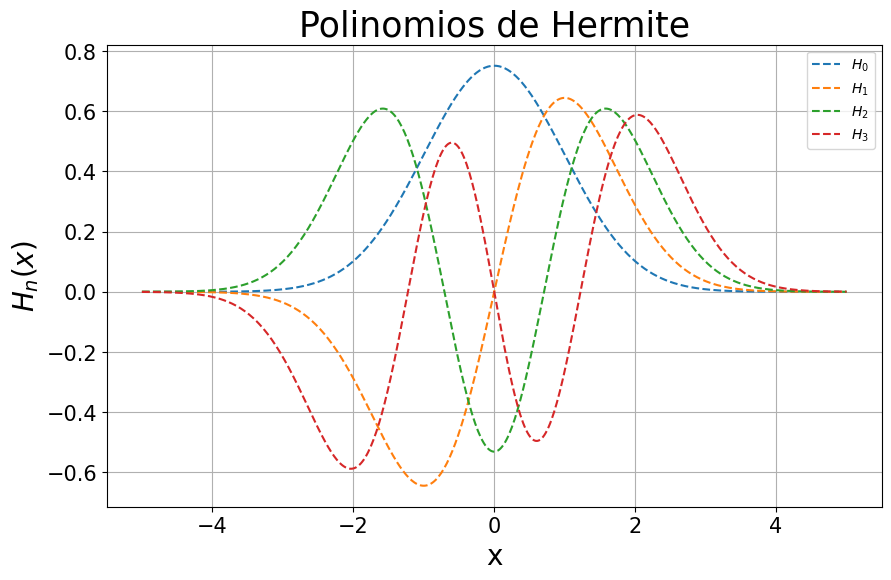

In [10]:
#Es bueno visualizar cómo se estan generando los polinomios de Hermite, para ello se realiza el siguiente codigo
n_states = 4
grid_x = np.linspace(-5,5,500)

plt.figure(figsize=(10, 6))
plt.title('Polinomios de Hermite', size=25)
for n in range(n_states):
    y = [hermite(x,n) for x in grid_x] 
    plt.plot(grid_x,y,'--',label=r'$H_{'+str(n)+'}$')
plt.xlabel('x',size=20)
plt.ylabel(r'$H_{n}(x)$',size=20)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.legend()
plt.show()

Si buscamos en la **literatura** o simplemente en el navegador de **google** la palabra: *"polinomios de Hermite"* en las imagenes vamos a notar que son similares a estos que estan siendo construidos a partir de métodos de recurrencia. Por lo tanto, se puede continuar usando este método sin problema alguno.

## Aplicación del método al problema con un baño termico. 

Anteriormente se considero que la probabilidad de transición entre dos estados estaba dada por: 

$$ \left|\frac{\psi_{0}(x^{\prime})}{\psi_{0}(x)}\right|^{2} \text{,}$$ 

esto se hizo debido a que, se hacia uso de una sola función de onda $\psi_{0}$. En este caso, como se utiliza la composición de todas las funciones de onda, es necesario definir un método más general. Como tal, esta función de transición o el valor que nos determina cuando se acepta una transición y cuando se deniega, debe ser un valor entre $0$ y $1$, por lo tanto, si el valor de transición supera a $1$ es solo necesario considerar $1$ como la probabilidad de transición. En otras palabras, de forma más general para considerar el paso de un lugar a otro lo mejor es considerar la función general dada por: 

$$ p ( x \rightarrow x^{\prime}) = \text{min} ( 1 , |\psi_{n}(x^{\prime}) / \psi_{n}(x)|^{2}) \text{,}$$

esto siempre y cuando se consideren transiciones entre las posiciones ($x$), pero en el mismo nivel de energía $n$. Hasta ahora, lo único que hemos hecho es considerar transiciones entre dos posiciones diferentes, sin tener en cuenta la temperatura, ni nada por el estilo. 

Según la física se sabe que, el tener una temperatura diferente de cero afecta directamente a la energía, o sea, se permiten las transiciones entre diferentes valores de energía. Por ejemplo, en este caso (el caso cuantico), el someter el oscilador armónico a un baño termico, va a general que sea posible las transiciones entre los diferentes niveles de energía discretos que estan en el modelo. Esto nos da un indicio que, las transiciones entre dos posiciones pero al mismo nivel de energía no se ven afectadas por la temperatura; si en cambio, tenemos transiciones entre niveles de energía debemos añadir un factor que tenga esta temperatura incluida.

Para esto, se considera la función de onda, cuando esta sometida a un baño termico estará dada por la expresión: 

$$ \psi(x,T) = \psi_{n} (x) e^{\beta E_{n}/2} \text{ ,}$$

siendo $\beta = 1/T$ (en unidades naturales). En este caso se toma la transición entre $2$ niveles de energía, pero a la misma posición en $x$, por lo tanto, se posee un factor de este estilo: 

$$ \text{factor} = |\psi_{m}(x) / \psi_{n}(x)|^{2} e^{\beta \Delta E}\text{ ,}$$

siendo $ \Delta E = E_{m} - E_{n} $ con $E_{n} = n + 1/2$. En este caso, siguiendo el analisis anterior, la  probabilidad de transición entre dos estados de energía diferentes tendría la forma: 

$$ p ( n \rightarrow m) = \text{min} ( 1 , |\psi_{m}(x) / \psi_{n}(x)|^{2} e^{\beta \Delta E}) \text{.}$$

Es importante tener presente varios detalles a la hora de analizar esta clase de comportamientos. Según como se construya el algoritmo, es posible tener transiciones de niveles de energía altos a bajos o efectos contrarios, pasar de un nivel bajo a un nivel alto. Pero por la forma de la energía, sería imposible tener transiciones donde el valor de $m$ sea menor que cero. Por lo tanto, aunque el programa que se muestra a continuación permite calcular valores de $m<0$, la transición a estos estados nunca es aceptada. 

El algoritmo construido anteriormente únicamente permitia la transición entre posiciones, ahora vamos a considerar también la transición entre niveles de energía. Para efectuar los calculos de formas más eficientes y evitar problemas, no existen transiciones de posición y energía al mismo tiempo para una misma iteración, sino que se realizan transiciones de formas intercaladas, por ejemplo, primero se calcula si es posible una transición de posición y luego, en otra iteración se analiza si es posible una transición entre niveles de energía. Esto último no afecta en nada el fenomeno físico ya que, visto de forma gráfica, si se realiza transición entre la posición y los niveles de energía, físicamente se puede ver como dos eventos separados.

In [11]:
#Valores de energía para un estado n. 
def energy(n):
    return n + 1/2

#Algoritmo de Metropolis para temperatura finita
def metropolis_oscilador_armonico(beta, n_steps=100000, x_range=5.0, trans = 1):
    #En caso de querer modificar el rango de transición entre los vecinos, cambiar trans a cualquier otro número positivo.
    
    # Condiciones inciales
    x = np.random.uniform(-x_range, x_range) #Vamos a generar una posición inicial aleatoria
    #En el otro codigo era 0, en este caso pues, vamos a considerar un sistema que no parte desde 0.
    n = 0 #Pero en este caso si vamos a considerar que partimos del estado base de energía. 
    delta_x = 0.5  # Tamaño del paso para movidas en x
    
    data = [] #Para almacenar los datos.

    '''
    Vamos a plantear el método de montecarlo para estos polinomios. 
    Vamos a recorrer n_steps pasos. 
    Si el paso es par, vamos a considerar transiciones de x a x', cuando sean impares vamos a considerar transiciones entre n a m. 
    '''
    for step in range(n_steps):
        #si vamos a transitar de x a x' step debe ser par. 
        if step % 2 == 0:
            # Vamos a generar un nuevo valor de x, manteniendo fijo n.
            x_new = x + random.uniform(-delta_x, delta_x)
            
            #Vamos a usar la función de Hermite definida arriba
            psi_ratio = hermite(x_new, n)/hermite(x, n) #Calculamos el ratio. 
            p_accept = min(1, abs(psi_ratio)**2) #Calculamos el valor minimo entre 1 y el ratio al cuadrado
            
            #Probabilidad de aceptación 
            if np.random.uniform(0.0,1.0) < p_accept:
                x = x_new
                
        #Si vamos a transitar de n a m, step debe ser impar.
        #Se deja fijo el valor de x. 
        else:
            #En este caso, vamos a suponer existen transiciones entre los vecinos, o sea, transiciones de un estado n a un estado n-trans 
            #o n+trans. Por defecto trans = 1 
            
            m = n + np.random.choice([-trans, trans])
            
            #Solo cuando m >= 0 vamos a aceptar la transición.
            #Cuando m < 0 la rechazamos.
            if m >= 0:
                
                #Calculamos el delta de energía. 
                delta_E = energy(m) - energy(n)
                
                # Probabilidad de aceptación con diferentes n,m
                psi_ratio = hermite(x, m)/hermite(x, n) #Calculamos el ratio.
                p_accept = min(1, abs(psi_ratio)**2 * np.exp(-beta*delta_E)) #Calculamos el valor minimo entre 1 y el ratio al cuadrado.
                #multiplicado por la exponencia del delta de energía por beta. 
                
                #Vamos a plantear el criterio para aceptar la transición de niveles de energía. 
                if np.random.uniform(0.0,1.0) < p_accept: 
                    n = m #Actualizamos el valor del nivel de energía.
        
        #Según chat gpt, es indicado realizar este proceso de guardar cada 10 pasos, con la intención de evitar correlación entre los pasos.
        #Por lo tanto, vamos a probar cómo funciona el modelo cuando guardamos cada 10 pasos.
        #if step % 10 == 0:
        data.append({'x': x, 'n': n}) #Guardamos un diccionario con los valores de x y n. 
    
    return data

Se desea realizar un análisis cuando tenemos un comportamiento de diferentes temperaturas, o temperaturas inversas ($\beta$). 

En este caso, nos vamos a enfocar en 3 valores diferentes $\beta = 0.2 \text{ ,} 1.0 \text{ ,} 5.0$. Ademas, se realiza un gráfico para comparar con la función teorica tanto para la mecanica cuántica como para la mecanica clásica.

Para esto es necesario partir de la función de onda, dada por la ecuación: 

$$ \psi_{n}(x) = \frac{1}{\pi^{1/4}} e^{-x^2 / 2} H_{n}(x) \ŧext{ ,}$$ 

con $m = \hbar = \omega = 1$. La función $\rho$ no renormalizada, la podremos escribir como: 

$$ \rho^{n.r}(x,x^{\prime},\beta) = \sum_{n} \psi_{n}(x) e^{-\beta E_{n}} \psi_{n}(x^{\prime})$$.

Usando la ecuación anterior vamos a tener que: 

$$ \rho^{n.r}(x,x^{\prime},\beta) = \frac{1}{\pi^{2}} \sum_{n} e^{-\beta \epsilon} e^{-\frac{1}{2} (x^{2} + x^{\prime 2})} H_{n}(x) H_{n}(x^{\prime} \text{.}$$

Usando la siguiente propiedad de las funciones de Hermite es posible pasar de la ecuación anterior a esta ecuación: 

$$ \rho^{n.r}(x,x^{\prime},\beta) = \frac{1}{\sqrt{\pi}}\frac{e^{-\beta /2} e^{-\frac{x^2 + x^{\prime2}}{2}}}{\sqrt{1-e^{-2\beta}}} \text{exp} \left( \frac{2e^{-\beta} x x^{\prime} - e^{-2 \beta}(x^2 +x^{\prime 2}}{1 - e^{-2\beta}} \right)\text{.}$$

Si utilizamos la definición de los ángulos hiperbolicos, 

$$ \text{sinh} (\beta) = (e^{\beta} - e^{-\beta}) / 2 \text{ , } \text{cosh}(\beta) = (e^{\beta} + e^{-\beta})/2 \text{ ,}$$

vamos a terminar obteniendo: 

$$ \rho^{n.r}(x,x^{\prime},\beta) = \frac{e^{-\frac{x^2 + x^{\prime2}}{2}}}{\sqrt{2\pi\text{sinh}(\beta)}} \text{exp} \left(\frac{2e^{-\beta} x x^{\prime} - e^{-2 \beta}(x^2 +x^{\prime 2})}{2\text{sinh}(\beta)} \right) \text{ .}$$

Cuando $x = x^{\prime} $, se obtiene la siguiente ecuación: 

$$
\rho^{n.r}(x,x,\beta) = \frac{1}{\sqrt{2\pi\text{sinh}(\beta)}} \text{exp} \left( - x^{2} \left( \text{coth}(\beta) + \frac{1} {\text{sinh}(\beta)} \right) \right) \text{ .}
$$

La función de distribución está dada por: 

$$ \pi (x) = \rho^{n.r}(x,x,\beta) / Z(\beta) \text{ ,}$$

con $Z(\beta) = 1/2\text{sinh}(\beta/2) \text{ .}$ Reemplazando en la ecuación anterior, vamos a tener:  

$$ \pi (x) = \frac{2\text{sinh}(\beta/2)}{\sqrt{2\pi\text{sinh}(\beta)}} \text{exp} \left( - x^{2} \left( \text{coth}(\beta) + \frac{1} {\text{sinh}(\beta)} \right) \right) \text{ ,}$$

realizando procedimientos algebraicos, 

$$\pi_{\text{Quantum}}(x) = \sqrt{\frac{\text{tanh}(\beta/2)}{\pi}} \text{exp} \left( - x^{2} \text{tanh}\left(\frac{\beta}{2} \right) \right) \text{ .} $$

La ecuación anterior, es la ecuación que describe la función de distribución para el oscilador armónico cuántico. 


Cuando se considera que $\beta \rightarrow 0$, se esta abordando el sector de las altas temperaturas lo que tiene relación a valores del límite clásico. Haciendo esta aproximación se puede escribir: 

$$ \text{tanh}\left(\frac{\beta}{2}\right) = \frac{\beta}{2} -\frac{1}{3}\left(\frac{\beta}{2}\right)^{3} + ... \text{ ,}$$ 


$$ \beta \rightarrow 0   \Longrightarrow \pi(x)\thickapprox \sqrt{\frac{(\beta/2)}{\pi}} \text{exp} \left( - x^{2} \frac{\beta}{2} \right) \text{ ,}$$

esta función va a ser la función de distribución clásica. Entonces: 

$$ \pi_{\text{class}}(x) = \sqrt{\frac{\beta}{2\pi}} \text{exp}\left(-\frac{\beta x^{2}}{2}\right) \text{ .}$$


La idea, es comparar qué tanto el algoritmo puede arrojarnos la misma información que estas dos funciones, tanto para la forma cuántica como la forma clásica. Ademas, tener presentes diferentes valores de temperatura y mirar qué tanto describe nuestro modelo a estos resultados. 

In [12]:
#Distribuciones teoricas
#Distribución cuantica
def distribucion_exacta_cuantica(x,betta):
    return np.sqrt(np.tanh(betta/2)/np.pi) * np.exp(- (x**2) * np.tanh(betta/2))
    
#Distribución clásica
def distribucion_exacta_clasica(x,betta):
    return np.sqrt(betta/(2*np.pi))*np.exp(-(betta * x**2)/ 2)


#La siguiente función nos va a permitir ejecutar el método de metropolis junto con realizar el respectivo gráfico.
def ejecutar(beta, flag_graficar = True):
    #la flag es usada por defecto en True para gráficar los datos. 
    #Ajustes esteticos.
    print("-"*140)
    print(str("-"*53)+f"\033[1;31m\033[3;36mCorriendo simulación para β={beta}...\033[0m"+str("-"*53))
    print("-"*140)
    print("")
    data = metropolis_oscilador_armonico(beta, n_steps=100000,trans=1) #Ejecutamos el método de metropolis definido anteriormente.
    
    x_values = [d['x'] for d in data] #Almacenamos los valores en x. 
    n_values = [d['n'] for d in data] #Almacenamos los valores de energía.
    #Tenemos una bandera para gráficar o no los resultados. 
    #En algunos casos nos interesa no gráficar los resultados sino únicamente obtener los valores. 
    if (flag_graficar):        
        max_n = max(n_values) #Calculamos el valor máximo de energía. 
        
        x_fine = np.linspace(min(x_values), max(x_values), 100) #Para realizar el gráfico teorico. 
        
        plt.figure(figsize=(10, 6), constrained_layout=True)
    
        #Mostramos los bins de la posición.
        plt.hist(x_values, bins=30, density=True, range=(-5, 5), 
                 alpha=0.7, color='darkorange')

        #Calculamos la media y desviación estándar de los bins y gráficamos.
        media = np.mean(x_values)
        desviacion = np.std(x_values)
        plt.plot(media, 0, 'o', markersize=12, color='crimson')  # Rojo intenso
        plt.plot(media - desviacion, 0, '^', markersize=10, color='darkblue')  # Azul fuerte
        plt.plot(media + desviacion, 0, '^', markersize=10, color='darkblue')  # Azul fuerte
        
        #Muestra las funciones teoricas en pantalla.
        #Función cuantica.
        plt.plot(x_fine, distribucion_exacta_cuantica(x_fine,beta), '-',color='royalblue', lw=3, label='Teoría cuantica')
        #Función clásica.
        plt.plot(x_fine, distribucion_exacta_clasica(x_fine,beta), '+',color='rebeccapurple', lw=3, label='Teoría clásica')
        
        # Ajustes estéticos
        plt.title(f'Densidad de probabilidad conjunta (β={beta})', size=14)
        plt.xlabel(r'$x$', size=20)
        plt.ylabel(r'$\pi(x)$', size=20)
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.legend(fontsize=12, framealpha=0.9, loc='best')
        plt.ylim(0, 1)
        plt.xlim(min(x_values),max(x_values))
        plt.show()
    
    return x_values, n_values #Retornamos dos arreglos con los valores de posición y energía.

In [13]:
def graficar_energia(beta):
    #Esta función nos permite realizar un gráfico de los bins de la energía, le pasamos el valor de la temperatura. 
    #Detalles esteticos. 
    print("-"*140)
    print(str("-"*59)+f"\033[1;31m\033[3;36m Energía para β={beta}...\033[0m"+str("-"*59)) 
    print("-"*140)
    print("")
    energia = all_data[beta][1]
    
    plt.figure(figsize=(10, 6))
    
    #Histograma de energía
    plt.hist(energia, bins=50, density=True, 
             alpha=0.7, color='royalblue', edgecolor='navy', linewidth=0.7,
             label='Datos simulados')
    
    #Líneas verticales para la media y la desviación estándar.
    mean_energy = np.mean(energia)
    std_energy = np.std(energia)
    plt.axvline(mean_energy, color='crimson', linestyle='--', linewidth=2, 
                label=f'Media = {mean_energy:.2f}')
    plt.axvline(mean_energy - std_energy, color='darkorange', linestyle=':', linewidth=2)
    plt.axvline(mean_energy + std_energy, color='darkorange', linestyle=':', linewidth=2,
                label=f'$\sigma = ${std_energy:.2f}')
    
    # Ajustes estéticos.
    plt.title(f'Distribución de Energía para β={beta}', fontsize=16, pad=20)
    plt.xlabel(r'$E$', fontsize=18)
    plt.ylabel(r'$\pi(E)$', fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.4)
    buffer = (max(energia) - min(energia)) * 0.1  # 10% de margen
    plt.xlim(min(energia) - buffer, max(energia) + buffer)
    plt.ylim(0, plt.ylim()[1]*1.1)  # 10% más de espacio arriba
    plt.legend(fontsize=12, framealpha=0.9)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_42050/2986743789.py:24: SyntaxWarning: invalid escape sequence '\s'
  label=f'$\sigma = ${std_energy:.2f}')


In [14]:
#Valores de temperatura
betas = [0.2, 1.0, 5.0]
all_data = {} #Para almacenar toda la información ejecutada. 

--------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------Corriendo simulación para β=0.2...-----------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



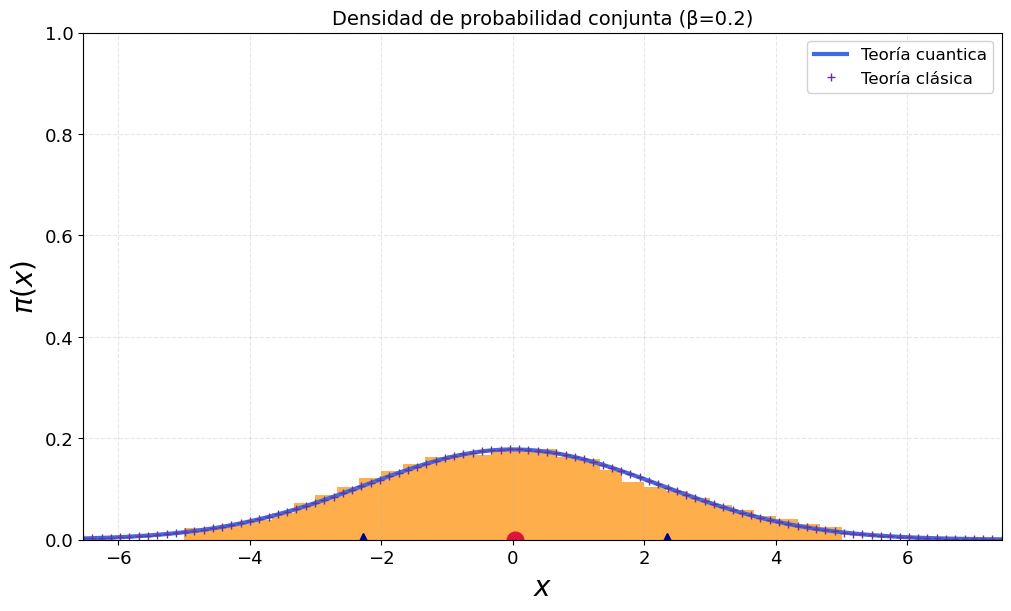

Errores con la función cuántica
Error cuadrático medio (MSE): 0.0034 %
KL Divergence: 0.0170
Coeficiente R²: 0.9903 

Errores con la función clásica
Error cuadrático medio (MSE): 0.0035 %
KL Divergence: 0.0173
Coeficiente R²: 0.9900 


In [15]:
#beta = 0.2
beta = betas[0] #Establezco el valor de beta
x_values, n_values = ejecutar(beta) #Ejecuto el algoritmo y gráfico. 

'''
La siguiente parte del codigo es hecha para imprimir los errores. 
Primero, a partir de los datos obtenidos por el algoritmo voy a generar los binds. 
Calculo el bin central para cada valor.
Evaluo los binds en las funciones teoricas y cuanticas. 
Imprimos los errores en pantalla usando la misma función usada para psi0.
'''
counts, bin_edges = np.histogram(x_values, bins=30, density=True) #Genero unos binds en función de los resultados obtenidos
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  #Calculamos el valor central de cada bin. 
valores_teoricos_cuantica = distribucion_exacta_cuantica(bin_centers,beta)  #El punto central con el valor teorico cuántico.
valores_teoricos_clasica = distribucion_exacta_clasica(bin_centers,beta)  #El punto central con el valor teorico clásico
#No se eleva al cuadrado porque ya es una función de distribución. 
print("\033[1;31m\033[3;36mErrores con la función cuántica\033[0m")
calc_error(counts,valores_teoricos_cuantica) #Calculo de errores con la función cuántica.
print("")
print("\033[1;31m\033[3;36mErrores con la función clásica\033[0m")
calc_error(counts,valores_teoricos_clasica) #Calculo de errores con la función clásica.
all_data[beta] = [x_values,n_values] #Almacenamos todos los datos.

De la gráfica ya es posible observar que, las dos funciones (clásica y cuántica) tienen un comportamiento similar al representado en el histograma. Cuando se hace una comparación entre las funciones teóricas con los datos generados por el algoritmo, es posible observar que, para ambas ecuaciones el método de metropolis reproduce con exactitud más del 99% de la teoría, esto es concluido a partir de su valor de R². Por otro lado, también es posible visualizar que, el error cuadratico medio es bastante pequeño, lo cual nos arroja una gran exactitud en los datos. Al final también se puede hacer enfasis en que, las discrepancia entre la teoria y el modelo son mínimas debido al valor tan bajo que tenemos de KL divergence. En conclusión, se puede concluir que, el algoritmo de métropolis permite describir adecuadamente el comportamiento teorico del oscilador armónico cuántico y clásico para una temperatura inversa de $0.2$.

--------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------- Energía para β=0.2...-----------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



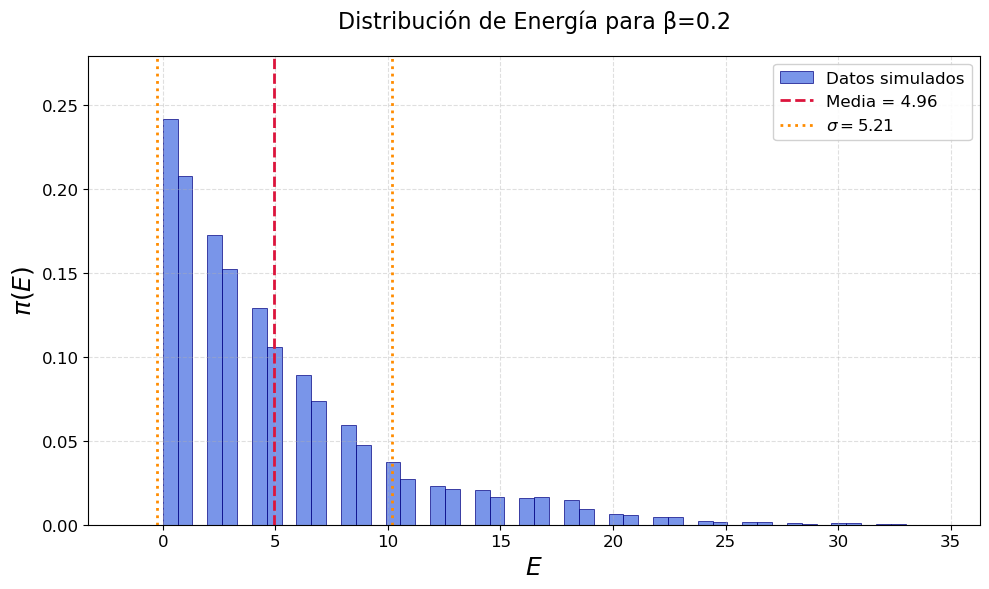

In [16]:
graficar_energia(betas[0]) #Para gráficar el histograma de la energía utilizo este codigo junto con el valor de la temperatura.

En el gráfico de la distribución de energía para la temperatura inversa de 0.2, se puede observar que, el espectro de los niveles de energía es bastante alto, yendo desde el valor $0$ hasta alrededor de $60$. Esto se puede explicar físicamente ya que, se somete al oscilador armónico a un baño térmico con una temperatura alta, en comparación a los otros valores mencionados anteriormente, lo cual nos lleva a que, las partículas no se encuentren tan localizadas en un sector sino que su rango de valores sea bastante amplio. 

--------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------Corriendo simulación para β=1.0...-----------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



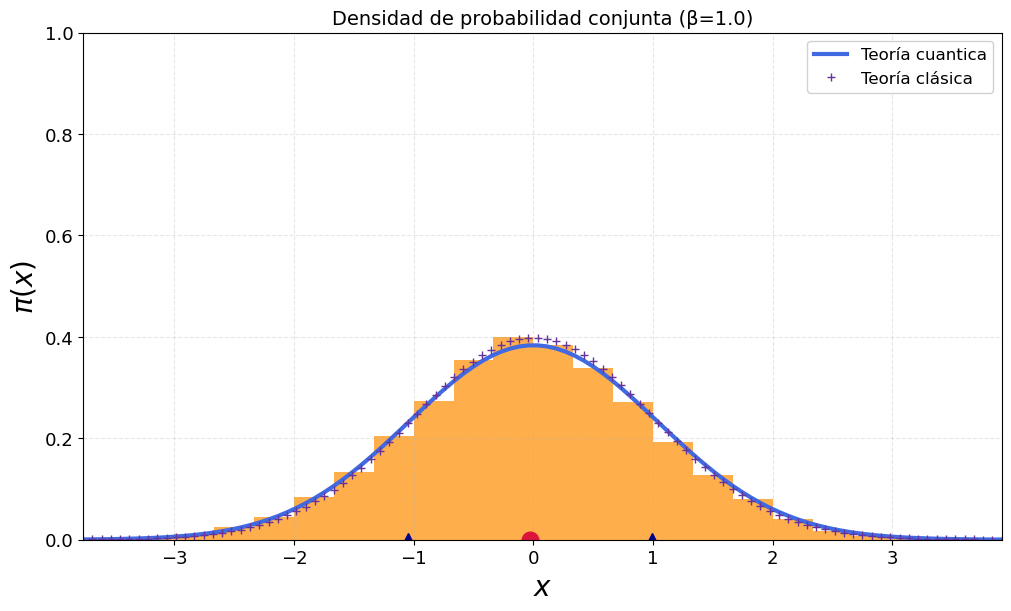

Errores con la función cuántica
Error cuadrático medio (MSE): 0.0046 %
KL Divergence: 0.0062
Coeficiente R²: 0.9976 

Errores con la función clásica
Error cuadrático medio (MSE): 0.0036 %
KL Divergence: 0.0071
Coeficiente R²: 0.9981 


In [17]:
#Este codigo es el mismo usando anteriormente. 
beta = betas[1]
x_values, n_values = ejecutar(beta)
counts, bin_edges = np.histogram(x_values, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  #Calculamos el valor central de cada bin. 
theoretical_values_cuantica = distribucion_exacta_cuantica(bin_centers,beta)  #El punto central con el valor teorico cuántico.
theoretical_values_clasica = distribucion_exacta_clasica(bin_centers,beta)  #El punto central con el valor teorico clásico
#No se eleva al cuadrado porque ya es una función de distribución. 
#plt.bar(bin_centers, abs(counts - theoretical_values), width=bin_edges[1] - bin_edges[0], alpha=0.5, color='blue')
print("\033[1;31m\033[3;36mErrores con la función cuántica\033[0m")
calc_error(counts,theoretical_values_cuantica)
print("")
print("\033[1;31m\033[3;36mErrores con la función clásica\033[0m")
calc_error(counts,theoretical_values_clasica)
all_data[beta] = [x_values,n_values] #Almacenamos todos los datos.

En este caso al aumentar la temperatura inversa se nota que aun los resultados para ambas teoricas aun tiene un comportamiento similar a los datos generados por el algoritmo. Esto se debe al calculo que realizamos anteriormente, al final la función clásica es calculada a partir de una aproximación. Por otro lado, es posible ver que, aun se matienen que el 99% de la información dada por el algoritmo puede replicar con presición las dos funciones, ademas, debido al valor de KL divergence se puede afirmar que, si existen diferencias entre las dos funciones, estas son minimas y los datos del algoritmo mapean con gran exactitud las funciones teoricas.

--------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------- Energía para β=1.0...-----------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



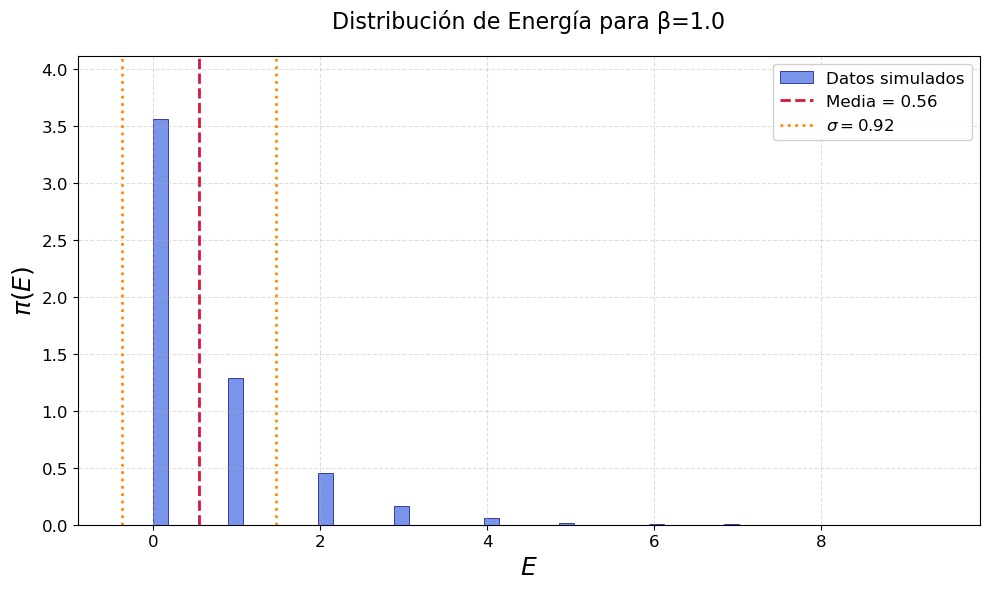

In [18]:
graficar_energia(betas[1]) #Gráfico histogramas de energías para el valor 2 de las tempraturas. 

En este caso, se puede observar, cuando se comparan con la temperatura anterior que los niveles de energía se disminuyen, lo cual nos indica que, la partícula sometida a este baño térmico con menor temperatura tiene menor rango de niveles de energía en el cual moverse, y a su vez, las probabilidades de alcanzar estos niveles son aun más pequeñas. 

--------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------Corriendo simulación para β=5.0...-----------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



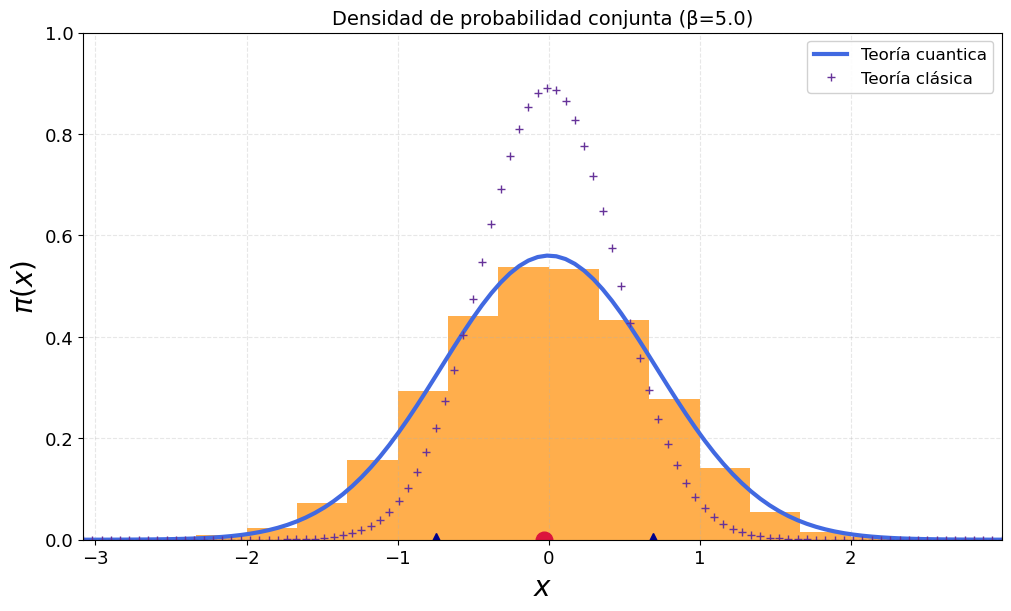

Errores con la función cuántica
Error cuadrático medio (MSE): 0.0037 %
KL Divergence: 0.0102
Coeficiente R²: 0.9990 

Errores con la función clásica
Error cuadrático medio (MSE): 1.3368 %
KL Divergence: 1.5840
Coeficiente R²: 0.6446 


In [19]:
beta = betas[2]
x_values, n_values = ejecutar(beta)
counts, bin_edges = np.histogram(x_values, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  #Calculamos el valor central de cada bin. 
theoretical_values_cuantica = distribucion_exacta_cuantica(bin_centers,beta)  #El punto central con el valor teorico cuántico.
theoretical_values_clasica = distribucion_exacta_clasica(bin_centers,beta)  #El punto central con el valor teorico clásico
#No se eleva al cuadrado porque ya es una función de distribución. 
#plt.bar(bin_centers, abs(counts - theoretical_values), width=bin_edges[1] - bin_edges[0], alpha=0.5, color='blue')
print("\033[1;31m\033[3;36mErrores con la función cuántica\033[0m")
calc_error(counts,theoretical_values_cuantica)
print("")
print("\033[1;31m\033[3;36mErrores con la función clásica\033[0m")
calc_error(counts,theoretical_values_clasica)
all_data[beta] = [x_values,n_values] #Almacenamos todos los datos.

Cómo en este caso ya se considera un valor alto de $\beta$, con respecto a los dos anteriores, o sea, se tiene un baño térmico con una temperatura más baja que los demas. La aproximación a bajos valores de $\beta$ ya no es valida, lo cual indica que, la función clásica ya se dispersa mucho de la función cuántica y a su vez, el algoritmo ya no va a replizar de manera precisa la función clásica. En el análisis de la compración entre las funciones, es posible ver que, en el caso clásico los datos unicamente puede describir el 66% de la información que contiene la teoria clásica. Mientras que, para la teoría cuántica si es posible tener una confianza del 99%. Por otro lado, en este punto, el valor de KL divergence nos indica que, es posible afirmar que, los datos arrojados por el algoritmo describe un comportamiento cuántico, caso contrario a lo que sucede al comparar con la función clásica donde el valor es bastante alto, y nos dice que, el algoritmo no a esta temperatura no es capaz de describir estos comportamientos clásicos.

--------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------- Energía para β=5.0...-----------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



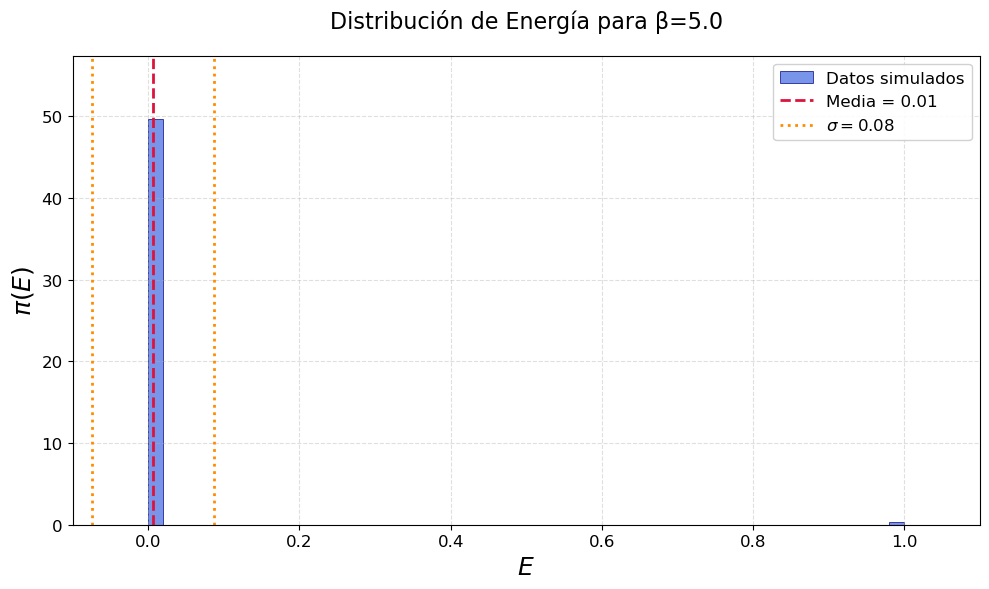

In [20]:
graficar_energia(betas[2]) #Gráfico histogramas de energías para el valor 3 de las tempraturas. 

En este caso, como ya la temperatura del baño térmico es pequeña, se espera que las fluctuaciones entre los niveles de energía sea bastante pequeños. Por ejemplo, las partículas se encontrarán localizadas en los primeros niveles de energía. En la imagen, es posible observar este comportamiento, donde únicamente se visualizan los dos primeros niveles de energía. Ademas, el nivel base o nivel cero, según el comportamiento de estos niveles, será el que posee mayor probabilidad de tener las partículas en este estado. El comportamiento es similar a lo esperado, ya que, al final, para temperaturas muy pequeñas, básicamente se estaría describiendo el comportamiento cuántico mencionado al inicio de este texto y ademas, debido a la baja temperatura las partículas no sean capaces de transicionar entre los diferentes estados de energía. 

In [21]:
#Vamos a modificar el método de metropolis, esto con la intención de hacerlo de la forma más general posible
#Para este caso, vamos a copiar todo el codigo anterior de la función de metropolis_harmonic_oscillator y vamos a cambiar
#la función hermite por wave_function y energy por enegy_levels. 
#La idea principal es que estos dos nuevos parámetros que le pasamos a metropolis_general son funciones de la función de onda 
#y la energía de los diferentes estados.
def metropolis_general(beta, wave_function, energy_levels, n_steps=100000, x_range=5.0):
    # Estado inicial
    x = np.random.uniform(-x_range, x_range) #Vamos a generar una posición inicial aleatoria
    n = 0 
    delta_x = 0.5  # Tamaño del paso para movidas en x
    
    data = []
    #Vamos a plantear el método de montecarlo para estos polinomios
    for step in range(n_steps):
        #Por ejemplo, si vamos a transitar de x a x' será cuando los pasos sean pares.
        if step % 2 == 0:
            # Vamos a generar un nuevo valor de x, manteniendo fijo n.
            x_new = x + random.uniform(-delta_x, delta_x)
            
            #Vamos a usar la función de hermite definida arriba
            psi_ratio = wave_function(x_new, n)/wave_function(x, n) #Calculamos el ratio. 
            p_accept = min(1, abs(psi_ratio)**2) #Calculamos el valor minimo entre 1 y el ratio al cuadrado
            
            #Probabilidad de aceptación 
            if np.random.uniform(0.0,1.0) < p_accept:
                x = x_new
        #Cuando el paso sea impar, vamos a variar el valor de n a m, dejando fijo el valor de x. 
        else:
            #Supongamos transiciones de un estado n a un estado n-1 o n+1.
            m = n + np.random.choice([-1, 1])
            
            #Vamos a plantear que, m debe ser siempre positivo, entonces si m < 0 rechazamos el valor. 
            if m >= 0:
                #Calculamos el delta de energía. 
                delta_E = energy_levels(m) - energy_levels(n)
                
                # Probabilidad de aceptación con diferentes n,m
                psi_ratio = wave_function(x, m)/wave_function(x, n) #Calculamos el ratio.
                p_accept = min(1, abs(psi_ratio)**2 * np.exp(-beta*delta_E)) #Calculamos el valor minimo entre 1 y el ratio al cuadrado
                #multiplicado por la exponencia del delta de energía por beta. 
                #Vamos a plantear un valor para aceptar el m. 
                if np.random.uniform(0.0,1.0) < p_accept: 
                    n = m
        data.append({'x': x, 'n': n}) #Guardamos un diccionario con los valores de x y n. 
    return data

In [22]:
def infinite_well(x,n,L=5.0):
    #En caso de estar por fuera del muro, vamos a devolver psi = 0.
    if np.abs(x) > L/2:
        return 0.0
    else:
    #Vamos a comenzar con n+1 ya que python se indexa desde 0
        return np.sqrt(2/L) * np.sin((n+1)*np.pi*(x+L/2)/L)

#Niveles de energía.
def energy_levels(n, L =5.0):
    return 0.5*(((n+1)*np.pi)/L)**2

def grafica_infinte_well(beta):
    print("-"*140)
    print(str("-"*53)+f"\033[1;31m\033[3;36mCorriendo simulación para β={beta}...\033[0m"+str("-"*53))
    print("-"*140)
    print("")
    
    data = metropolis_general(beta, infinite_well, energy_levels, n_steps=100000, x_range=2.5)
    
    
    x_values = [d['x'] for d in data]
    n_values = [d['n'] for d in data]
    max_n = max(n_values)

    
    plt.figure(figsize=(10, 6), constrained_layout=True)
    plt.hist(x_values, bins=30, density=True, range=(-5, 5), 
                 alpha=0.7, color='darkorange')

    #Calculamos la media y desviación estándar de los bins y gráficamos.
    media = np.mean(x_values)
    desviacion = np.std(x_values)
    plt.plot(media, 0, 'o', markersize=12, color='crimson')  # Rojo intenso
    plt.plot(media - desviacion, 0, '^', markersize=10, color='darkblue')  # Azul fuerte
    plt.plot(media + desviacion, 0, '^', markersize=10, color='darkblue')  # Azul fuerte
        
    # Ajustes estéticos
    plt.title(f'Densidad de probabilidad conjunta (β={beta})', size=14)
    plt.xlabel(r'$x$', size=20)
    plt.ylabel(r'$\pi(x)$', size=20)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(fontsize=12, framealpha=0.9, loc='best')
    plt.ylim(0, 1)
    plt.xlim(min(x_values)-1,max(x_values)+1)
    plt.show()
    return [x_values, n_values]

def graficar_energia_infinity_well(beta,all_data_):
    #Esta función nos permite realizar un gráfico de los bins de la energía, le pasamos el valor de la temperatura. 
    #Detalles esteticos. 
    print("-"*140)
    print(str("-"*59)+f"\033[1;31m\033[3;36m Energía para β={beta}...\033[0m"+str("-"*59)) 
    print("-"*140)
    print("")
    energia = all_data_[beta][1]
    
    plt.figure(figsize=(10, 6))
    
    #Histograma de energía
    plt.hist(energia, bins=50, density=True, 
             alpha=0.7, color='royalblue', edgecolor='navy', linewidth=0.7,
             label='Datos simulados')
    
    #Líneas verticales para la media y la desviación estándar.
    mean_energy = np.mean(energia)
    std_energy = np.std(energia)
    plt.axvline(mean_energy, color='crimson', linestyle='--', linewidth=2, 
                label=f'Media = {mean_energy:.2f}')
    plt.axvline(mean_energy - std_energy, color='darkorange', linestyle=':', linewidth=2)
    plt.axvline(mean_energy + std_energy, color='darkorange', linestyle=':', linewidth=2,
                label=f'$\sigma = ${std_energy:.2f}')
    
    # Ajustes estéticos.
    plt.title(f'Distribución de Energía para β={beta}', fontsize=16, pad=20)
    plt.xlabel(r'$E$', fontsize=18)
    plt.ylabel(r'$\pi(E)$', fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.4)
    buffer = (max(energia) - min(energia)) * 0.1  # 10% de margen
    plt.xlim(min(energia) - buffer, max(energia) + buffer)
    plt.ylim(0, plt.ylim()[1]*1.1)  # 10% más de espacio arriba
    plt.legend(fontsize=12, framealpha=0.9)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

<>:74: SyntaxWarning: invalid escape sequence '\s'
<>:74: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_42050/2495111495.py:74: SyntaxWarning: invalid escape sequence '\s'
  label=f'$\sigma = ${std_energy:.2f}')


In [23]:
betas = [0.2, 1.0, 5.0] #Valores de temperatura.
all_data = {}

--------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------Corriendo simulación para β=0.2...-----------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



/tmp/ipykernel_42050/2495111495.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12, framealpha=0.9, loc='best')


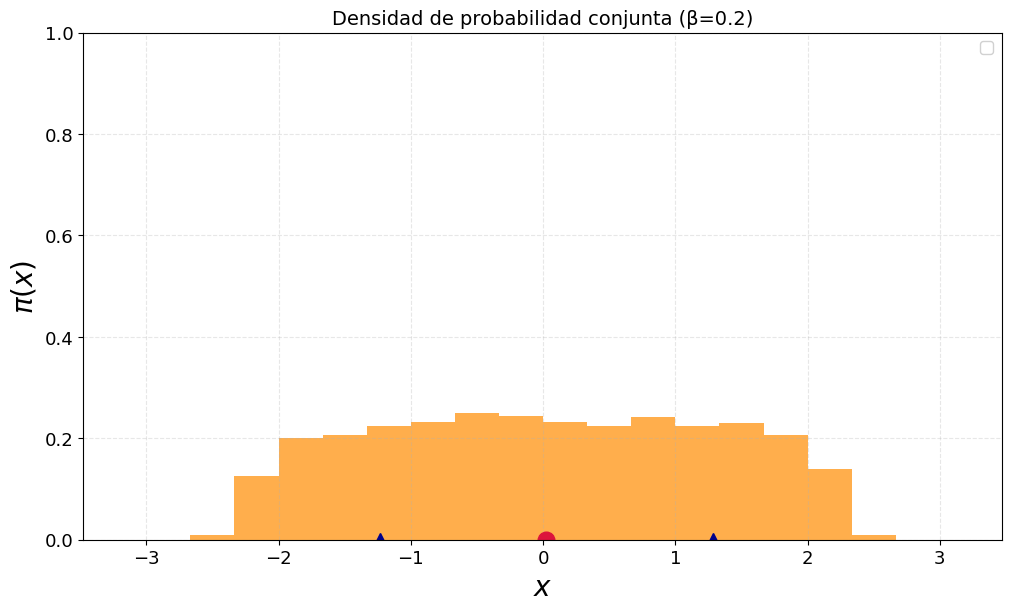

In [24]:
beta = betas[0]
data = grafica_infinte_well(beta)
all_data[beta] = data

--------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------- Energía para β=0.2...-----------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



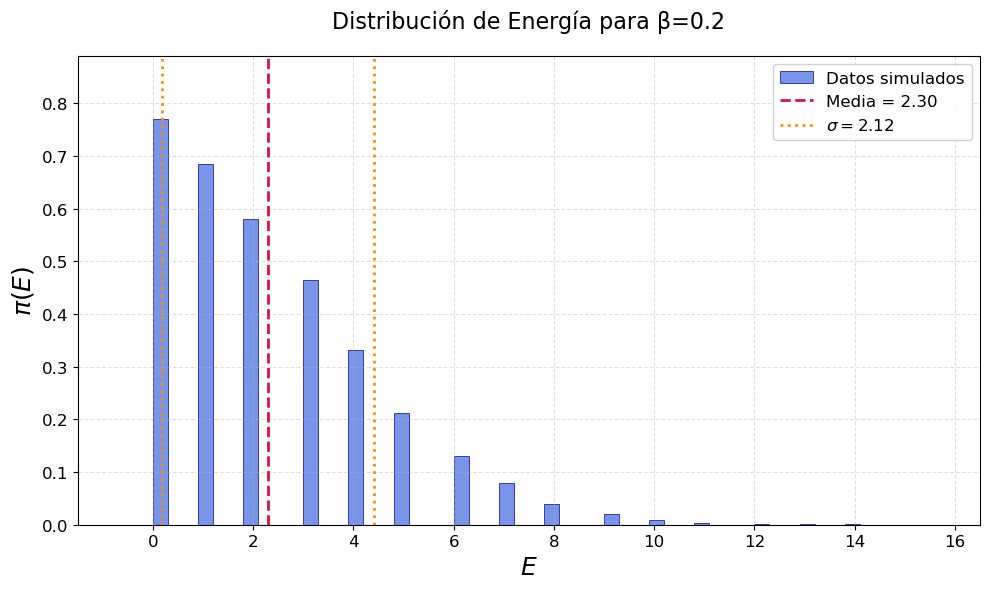

In [25]:
graficar_energia_infinity_well(beta,all_data)

--------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------Corriendo simulación para β=1.0...-----------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



/tmp/ipykernel_42050/2495111495.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12, framealpha=0.9, loc='best')


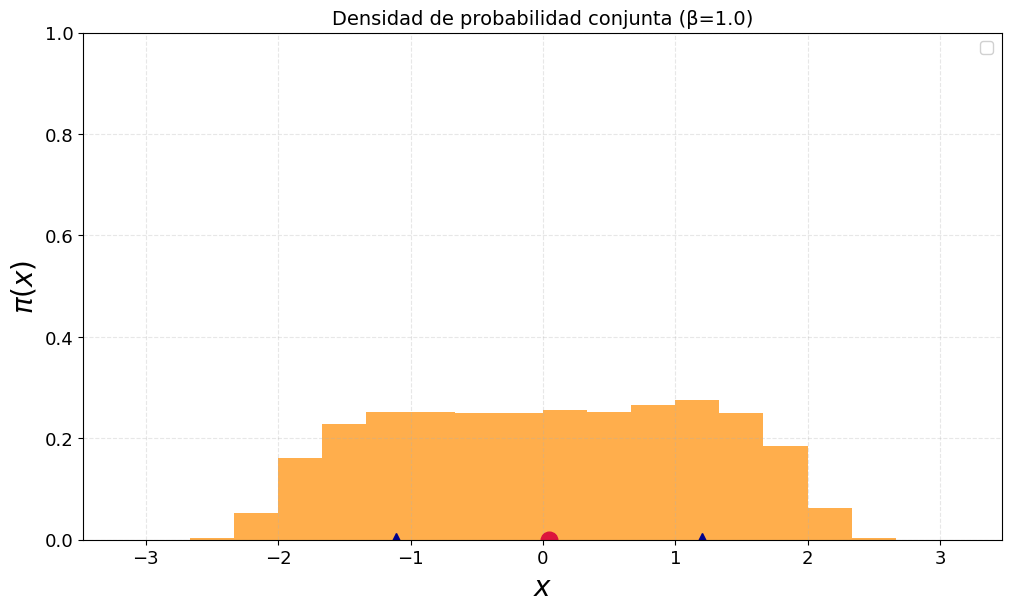

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [26]:
beta = betas[1]
data = grafica_infinte_well(beta)
all_data[beta] = data
print(all_data)

--------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------- Energía para β=1.0...-----------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



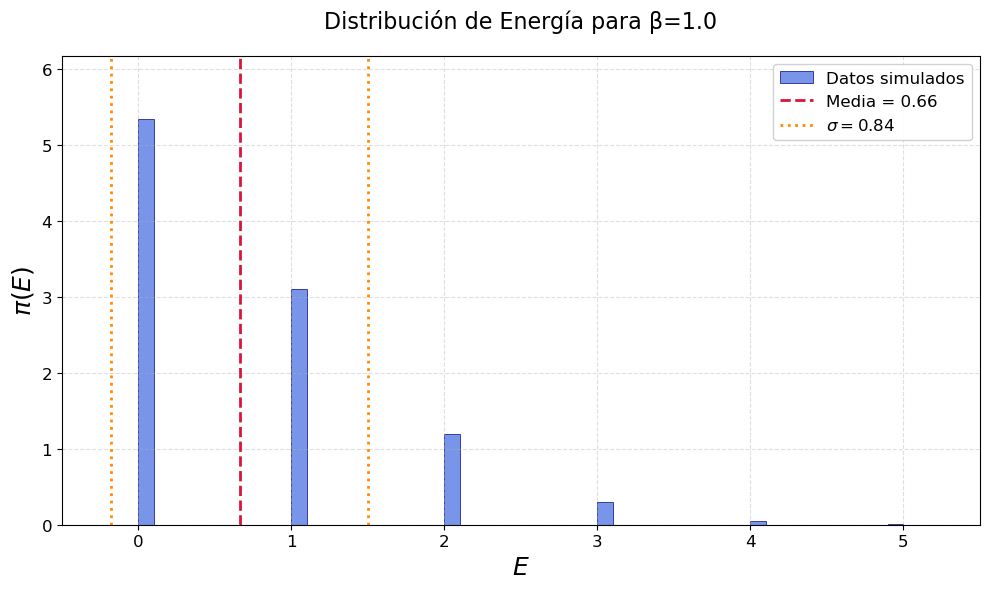

In [27]:
graficar_energia_infinity_well(beta,all_data)

--------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------Corriendo simulación para β=5.0...-----------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



/tmp/ipykernel_42050/2495111495.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12, framealpha=0.9, loc='best')


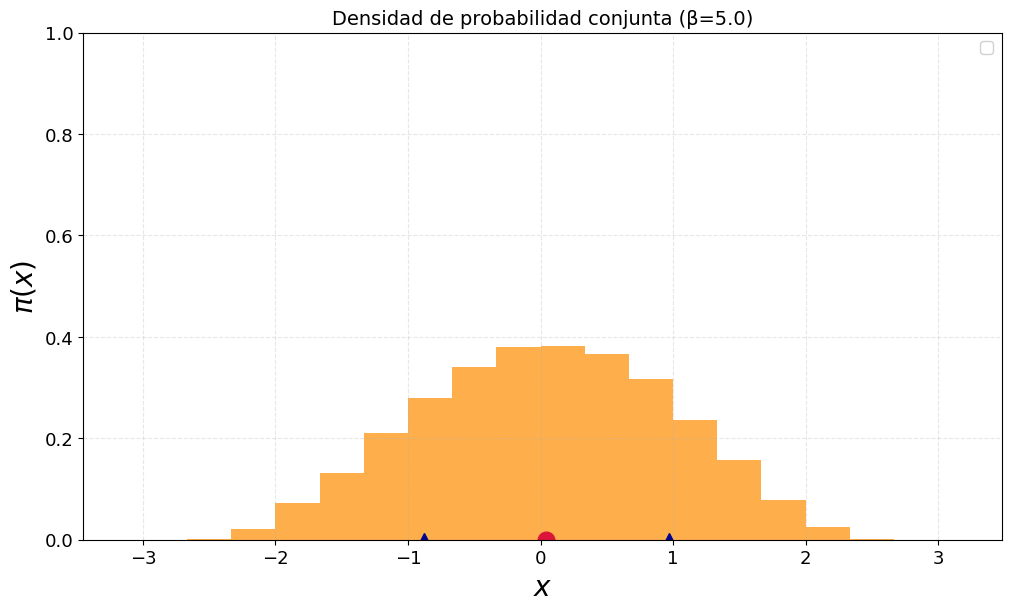

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [28]:
beta = betas[2]
data = grafica_infinte_well(beta)
all_data[beta] = data
print(all_data)

--------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------- Energía para β=5.0...-----------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------



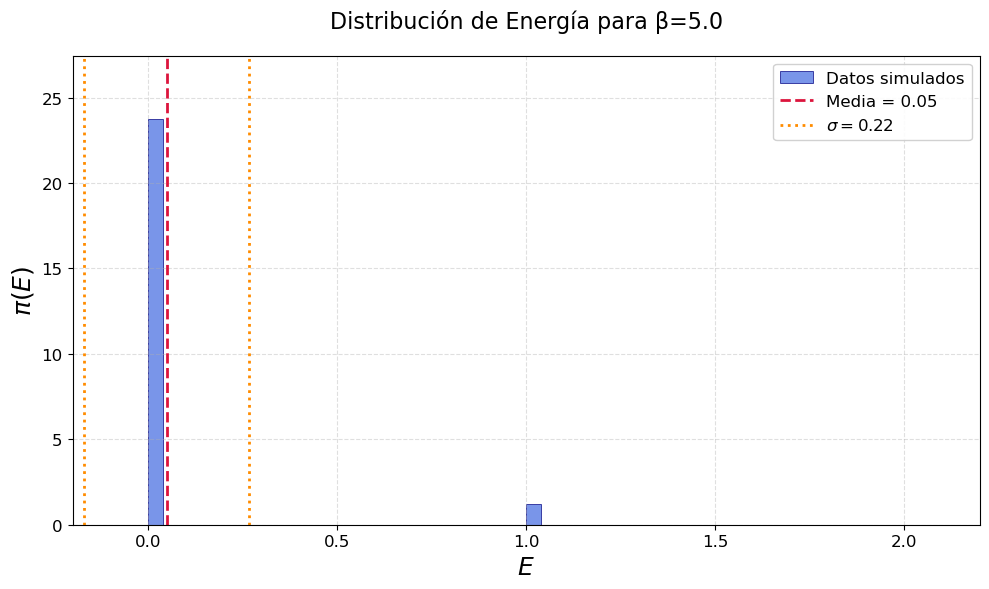

In [29]:
graficar_energia_infinity_well(betas[2],all_data)

## Conclusiones 

La construcción de este algoritmo Metropolis demuestra cómo es posible modelar sistemas cuánticos acoplados a baños térmicos utilizando únicamente la función de onda y los niveles de energía del sistema. Este "Toy model" nos ha permitido evaluar cuantitativamente hasta qué punto un proceso estocástico puede reproducir el comportamiento de sistemas cuánticos.

Los resultados muestran que el algoritmo alcanza una precisión notable, reproduciendo el 99% de las predicciones teóricas tanto a bajas como a altas temperaturas en sistemas cuánticos. El análisis numérico confirma que el método simula los modelos teóricos con una exactitud significativa, validando su robustez en diferentes regímenes térmicos.

Se verificó físicamente que al aumentar la temperatura del baño térmico, el espectro de energías se amplía, mientras que a temperaturas bajas el rango de niveles energéticos se reduce.

El algoritmo se extendió con éxito a otros sistemas, como el pozo de potencial infinito, reproduciendo los resultados físicos esperados.

Observamos que el método pierde precisión en el régimen de temperaturas muy bajas, donde las aproximaciones clásicas dejan de ser válidas. Esto subraya la importancia de seleccionar cuidadosamente los rangos de temperatura al aplicar estos métodos para problemas clásicos.

Estos resultados abren la posibilidad de estudiar sistemas cuánticos más complejos mediante aproximaciones estocásticas, aunque resaltan la necesidad de desarrollar formulaciones diferentes para el régimen clásico a bajas temperaturas, donde los efectos cuánticos dominan completamente el comportamiento del sistema.

## Bibliografía

- Breuer, H.-P., & Petruccione, F. (2002). The Theory of Open Quantum Systems. Oxford University Press.
  
- Hu, B. L., Paz, J. P., & Zhang, Y. (1992). Quantum Brownian motion in a general environment: Exact master equation with nonlocal dissipation and colored noise. Physical Review D, 45(8), 2843.
  
- Newman, M. E. J., & Barkema, G. T. (1999). Monte Carlo Methods in Statistical Physics. Oxford University Press.
  
- Landau, D. P., & Binder, K. (2014). A Guide to Monte Carlo Simulations in Statistical Physics. Cambridge University Press.
  
- Kullback, S., & Leibler, R. A. (1951). On Information and Sufficiency. Annals of Mathematical Statistics, 22(1), 79-86.

  
- Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). Bayesian Data Analysis (3rd ed.). CRC Press.

  
- Nagel, A., & Czado, C. (2016). Measuring the goodness of fit of copula models: A review and new approaches. Statistical Science, 31(3), 360-384.

## Agradecimientos 

En primer lugar, deseo expresar mi más profundo agradecimiento a mis padres, cuyo apoyo incondicional, paciencia y motivación han sido el pilar fundamental que me ha sostenido durante todos estos años de formación en física.

Quiero extender un especial reconocimiento a los docentes del Instituto de Física, cuya excelencia académica y dedicación han sido inspiración constante en mi desarrollo profesional. En particular, deseo destacar a aquellos profesores que, a través de metodologías pedagógicas innovadoras y un genuino compromiso con la enseñanza, lograron transmitir no sólo conocimientos teóricos, sino también una profunda pasión por la física y el pensamiento científico. Su influencia ha dejado una huella imborrable en mi formación como científico.

Agradezco igualmente a mis compañeros de estudio, cuyo compañerismo y colaboración han enriquecido significativamente esta experiencia académica. Las discusiones teóricas, las sesiones de estudio y el apoyo mutuo han sido elementos clave en mi proceso de aprendizaje.

Finalmente, reconozco el valioso aporte de todos aquellos investigadores y científicos cuyos trabajos han servido como fundamento para este proyecto. Su contribución al avance del conocimiento ha hecho posible que hoy podamos seguir explorando los misterios del universo físico.